# Exploratory Data Analises

In [1]:
from dotenv import load_dotenv, find_dotenv
import os
import sys 

_ = load_dotenv(find_dotenv())

project_path = os.environ["PROJECT_ABS_PATH"]
sys.path.append(os.path.abspath(os.path.join(project_path)))


import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from src.charts.PlotFactory import PlotFactory
from src.charts.BarPlotStrategy import BarPlotStrategy
from src.charts.BarPlotPandasStrategy import BarPlotPandasStrategy
from src.charts.BoxPlotPandasStrategy import BoxPlotPandasStrategy
from src.charts.ViolinPlotSeabornStrategy import ViolinPlotSeabornStrategy


import numpy as np
import pandas as pd
# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)        # Evita quebra de linha
pd.set_option('display.max_colwidth', None) # Mostra todo o conteúdo das células


In [ ]:
#TODO: colocar transformações aqui para reaproveitar durante a analise
heart_df = pd.read_csv('../data/heart.csv', sep = ',')

heart_df.rename(columns={'HeartDisease':'label'}, inplace=True)
heart_df.head(5)


heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'label'],
      dtype='object')

### Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    Por que essa classificação é importante?
    Angina típica (TA) aumenta muito a suspeita de doença arterial coronariana.

    Angina atípica (ATA) exige mais investigação (teste de esforço, angiografia).

    Dor não anginosa (NAP) geralmente tem causas menos graves.

    Assintomáticos (ASY) podem precisar de rastreio, especialmente se tiverem fatores de risco (hipertensão, diabetes).

    Se estiver analisando dados médicos (como em um dataset de cardiologia), essa variável ajuda a estratificar o risco dos pacientes.

4. RestingBP: resting blood pressure [mm Hg] quanto mais alto maior a chance de ataque
    Contexto em datasets médicos:

    Em modelos preditivos (ex.: prever doenças cardíacas), o RestingBP é uma variável chave.

    Valores extremos (muito altos ou muito baixos) podem indicar emergências (ex.: choque, crise hipertensiva).

5. Cholesterol: serum cholesterol [mm/dl]
    Por que essa variável é importante?
    Risco cardiovascular:

    Níveis elevados estão ligados a aterosclerose, infarto e AVC.

    Valores altos de LDL (> 130 mg/dL) são especialmente preocupantes.
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
alto nivel de acucar danifica vaso sanguineo, o que aumenta a probabilidade de ataque cardiaco

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    Normal:
    Interpretação: Sem sinais imediatos de anomalias cardíacas.

    ST:
    Interpretação: Pode sugerir falta de oxigênio no músculo cardíaco (isquemia) ou lesão miocárdica.

    LVH (Left Ventricular Hypertrophy):
    Interpretação: Associada a hipertensão arterial não controlada ou estenose aórtica, aumentando o risco de insuficiência cardíaca e arritmias.


8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    Pacientes com MaxHR significativamente abaixo do esperado têm maior risco de:
    Isquemia miocárdica (o coração não recebe sangue suficiente durante o esforço).
    Infarto prévio não diagnosticado.

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Pacientes com ExerciseAngina = Y têm maior risco de infarto, pois:

    A angina sugere isquemia cardíaca (falta de oxigênio no músculo cardíaco).

    Pode indicar placas ateroscleróticas nas artérias coronárias.

    Em modelos preditivos, essa variável costuma ser um forte preditor de eventos cardiovasculares.
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
    Oldpeak > 1.0 mV é um preditor forte de:

    Doença arterial coronariana (DAC).

    Infarto do miocárdio futuro.

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    A variável ST_Slope descreve o padrão do segmento ST no eletrocardiograma (ECG) registrado durante o pico de esforço em um teste de exercício (como teste ergométrico). Ela é categórica e indica a direção da inclinação do segmento ST, que reflete a resposta do coração ao estresse físico. Essa variável é um importante marcador de isquemia miocárdica e risco cardiovascular.

    Down e Flat são fortemente associados a:

    Doença arterial coronariana (DAC).

    Risco aumentado de infarto agudo do miocárdio.

    Em modelos preditivos, ST_Slope é uma feature crítica para identificar pacientes de alto risco.
    Correlação com Outras Variáveis:

    Cruze com:

    Oldpeak (depressão do ST).

    ExerciseAngina (angina durante esforço).

    ChestPainType (tipo de dor no peito).

12. HeartDisease: output class [1: heart disease, 0: Normal]
    Eh a variavel target

Numero de linhas e colunas

In [3]:
heart_df.shape

(918, 12)

In [4]:
resultado = heart_df.groupby('label') \
                    .agg(count=('label', 'count')) \
                    .reset_index()


print(type(resultado))
print(resultado)

<class 'pandas.core.frame.DataFrame'>
   label  count
0      0    410
1      1    508


The class imbalance {0} / {1}:

### missing values per column

In [5]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
label             0
dtype: int64

There are no missing values in the data

In [6]:
### ChestPainType data

heart_df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [7]:
### RestingECG data

heart_df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

### ExerciseAngina data

In [8]:
heart_df.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

### ST_Slope data

In [9]:
heart_df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

### Sex data 

In [10]:
heart_df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### bar chart of numerical attributes

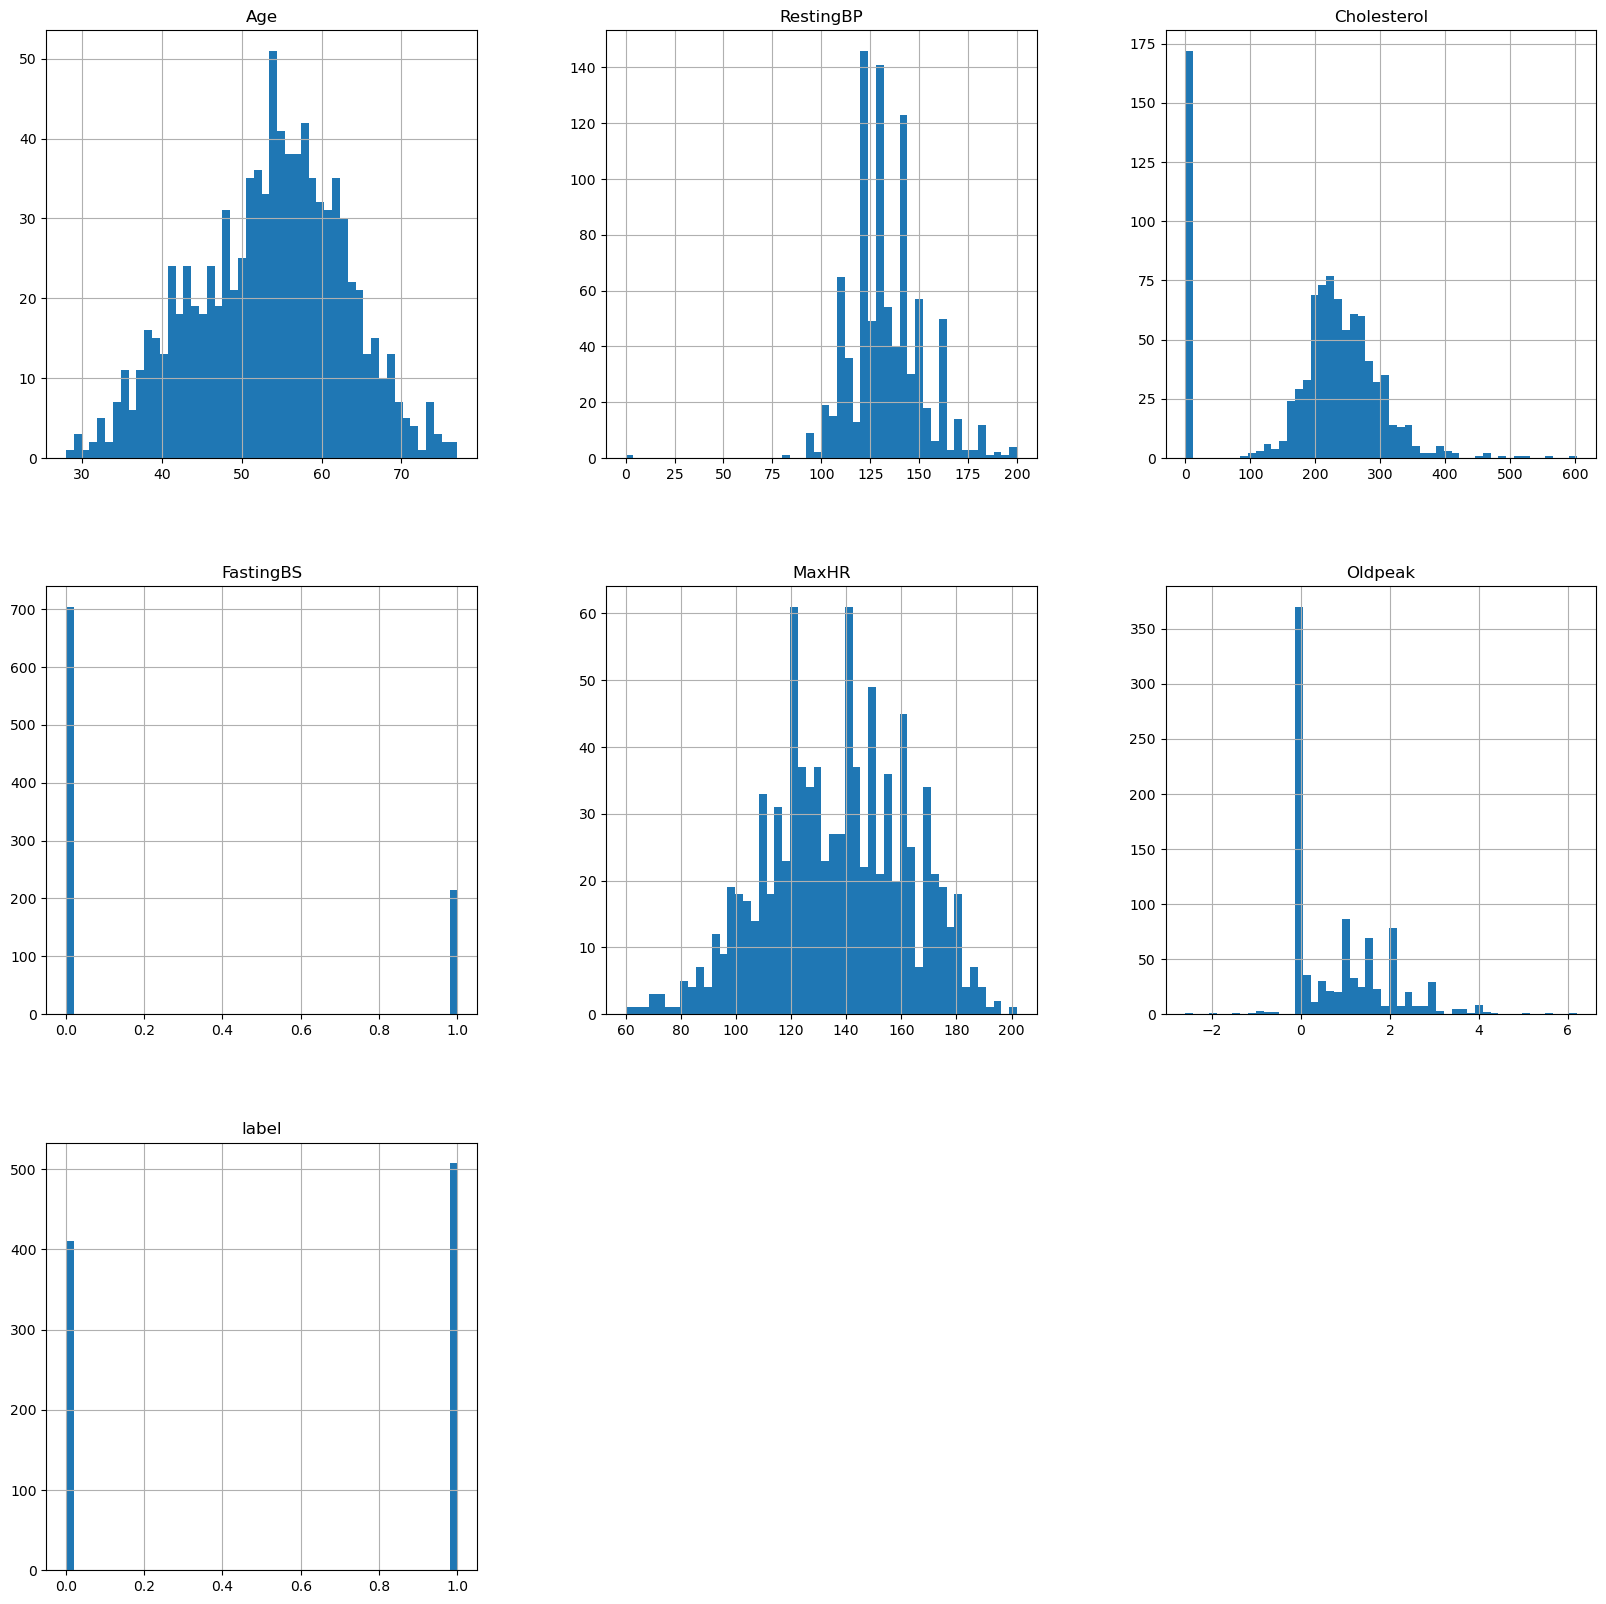

In [11]:
# import matplotlib.pyplot as plt

train_cat = heart_df.select_dtypes(include=[np.number])
train_cat.hist(bins=50, figsize=(20, 20))
plt.show()

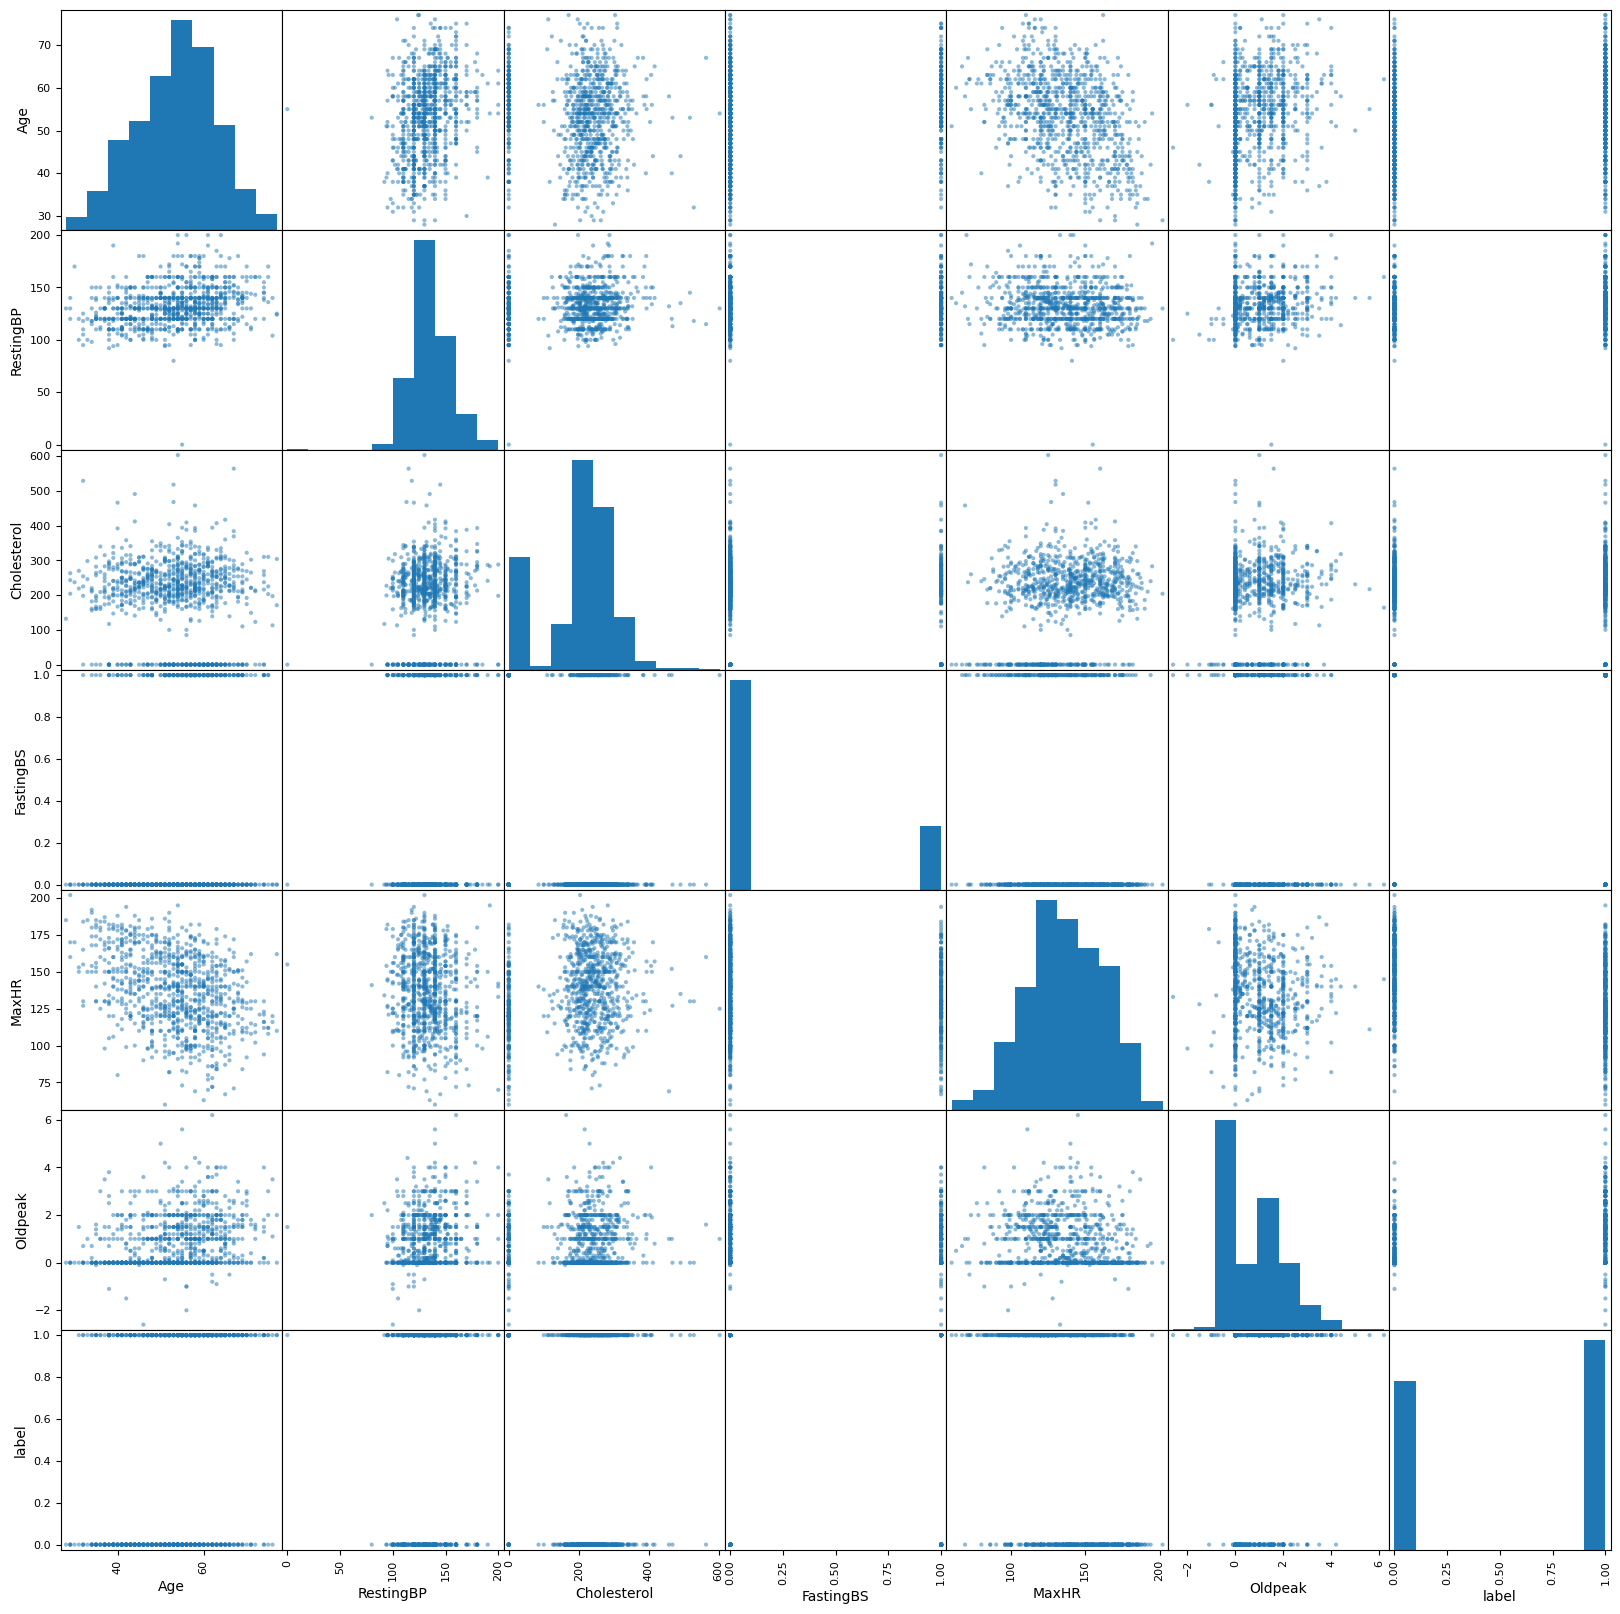

In [12]:
# from pandas.plotting import scatter_matrix
# import seaborn as sns
train_cat = heart_df.select_dtypes(include=[np.number])


scatter_matrix(train_cat, figsize=(20, 20))
plt.show()


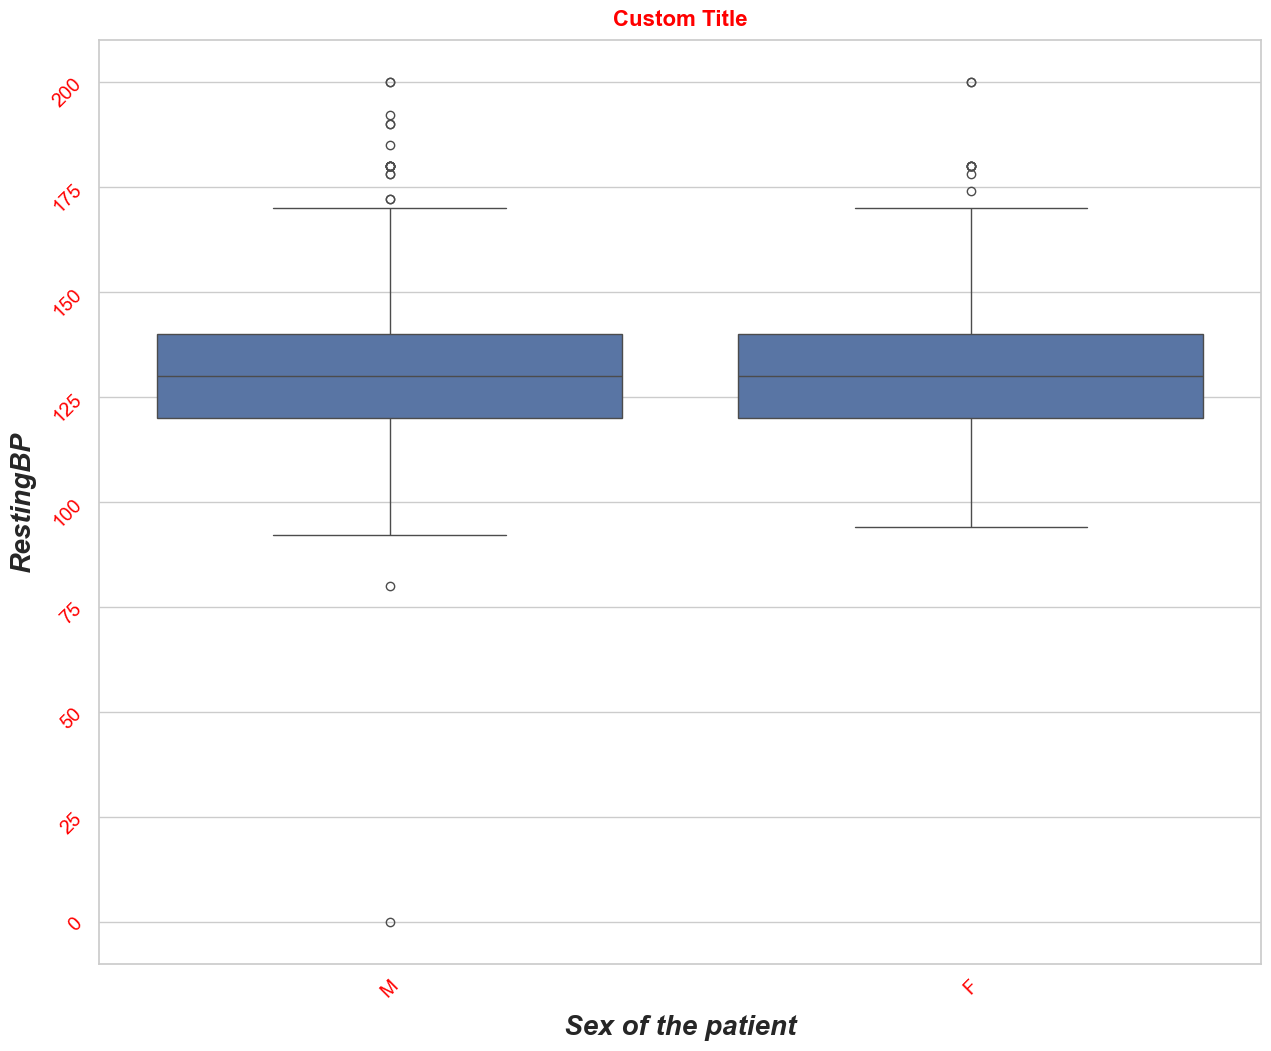

In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
# 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'

# Add a dark grid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 12))

# plt.title("Daily Total Bill Distribution")

# Create and display the plot

ax = sns.boxplot(y="RestingBP",
            x="Sex",
            # hue="smoker",
            orient = "v",
            data=heart_df,
            # palette="Set1",
            width=0.8)


ax.set_title(
    "Custom Title",
    fontsize=16,
    color="red",
    pad = 10,
    fontweight="bold",
)


# Customize ticks
ax.tick_params(
    axis='x',          # Apply to x-axis
    which='both',      # Both major and minor ticks
    labelsize=14,      # Font size
    rotation=45,       # Rotate labels (if needed)
    labelcolor='red'   # Optional: Change color
)


ax.tick_params(
    axis='y',          # Apply to x-axis
    which='both',      # Both major and minor ticks
    labelsize=14,      # Font size
    rotation=45,       # Rotate labels (if needed)
    labelcolor='red'   # Optional: Change color
)

ax.set_xlabel(
    "Sex of the patient",
    fontsize=20,
    fontstyle='italic',
    fontweight='bold',
    labelpad=10  # Padding between label and axis
)


ax.set_ylabel(
    "RestingBP",
    fontsize=20,
    fontstyle='italic',
    fontweight='bold',
    labelpad=10  # Padding between label and axis
)

plt.show()


### Test strategy+factory to use plots: ST_Slope variable

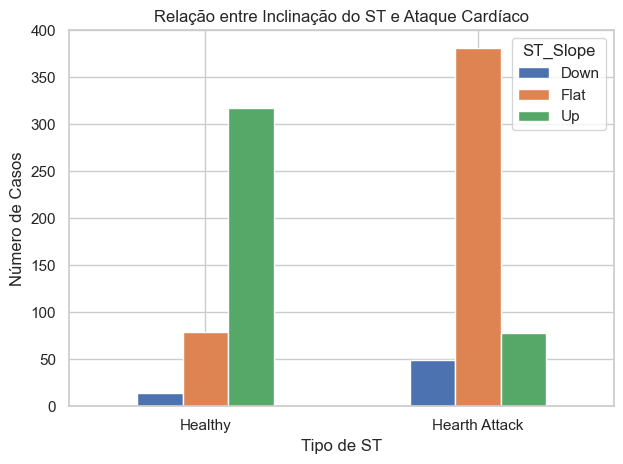

In [14]:
# import sys
# import os
# # Adiciona o diretório acima ao PATH do Python
# sys.path.append(os.path.abspath(os.path.join('..')))

# from charts.BarPlotStrategy import BarPlotStrategy
# from charts.BarPlotPandasStrategy import BarPlotPandasStrategy
# from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



# plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = heart_df.groupby(['ST_Slope', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['ST_Slope'] + "_" + resultado['label_str']


# import pandas as pd

# Configurar para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.width', None)  # Evita quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra todo o conteúdo das células


# print(resultado.head(10))

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='ST_Slope', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

# print('--'*100)
# print(resultado_piv)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre Inclinação do ST e Ataque Cardíaco",
                    xlabel="Tipo de ST",
                    ylabel="Número de Casos"
                    )



### ChestPainType variable

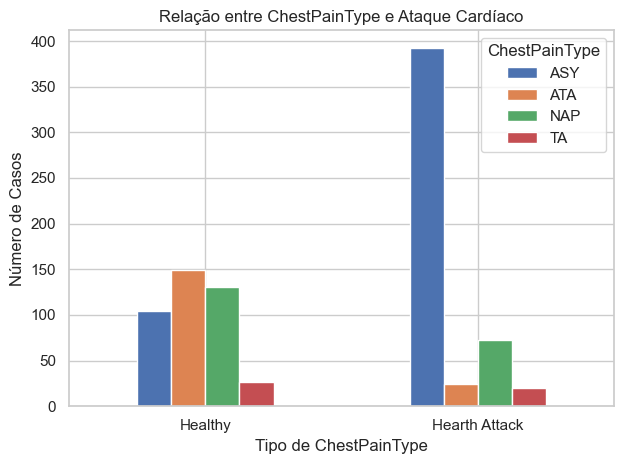

In [15]:
# import sys
# import os
# # Adiciona o diretório acima ao PATH do Python
# sys.path.append(os.path.abspath(os.path.join('..')))

# from charts.BarPlotStrategy import BarPlotStrategy
# from charts.BarPlotPandasStrategy import BarPlotPandasStrategy
# from charts.PlotFactory import PlotFactory


# bar_strategy = BarPlotStrategy()
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



# plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = heart_df.groupby(['ChestPainType', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['ChestPainType'] + "_" + resultado['label_str']

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='ChestPainType', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre ChestPainType e Ataque Cardíaco",
                    xlabel="Tipo de ChestPainType",
                    ylabel="Número de Casos"
                    )



### RestingECG 

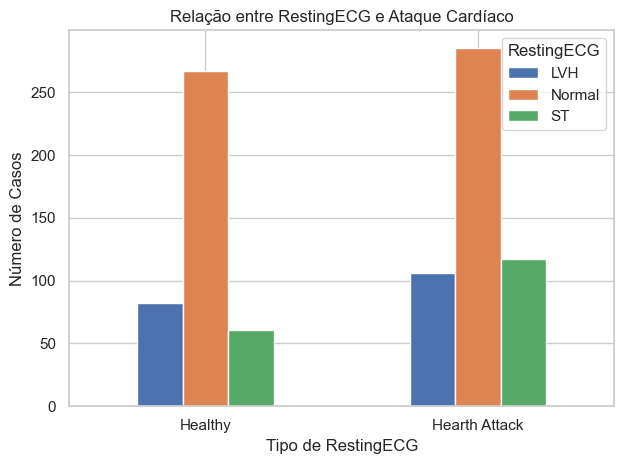

In [16]:
bar_strategy = BarPlotPandasStrategy()
factory = PlotFactory(bar_strategy)



# plot_df_train = pd.concat([train, train_label], axis = 1)

resultado = heart_df.groupby(['RestingECG', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['RestingECG'] + "_" + resultado['label_str']

resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='RestingECG', 
                                values = 'count').reset_index()



mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
resultado_piv['label_readable'] = resultado_piv['label_str'].map(mapping)

factory.create_plot(
                    data=resultado_piv,
                    x="label_readable",
                    y="count",
                    title="Relação entre RestingECG e Ataque Cardíaco",
                    xlabel="Tipo de RestingECG",
                    ylabel="Número de Casos"
                    )

### RestingBP

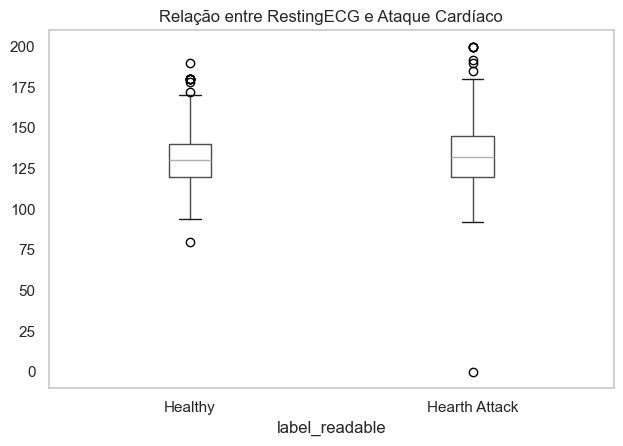

In [17]:
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                    data = heart_df,
                    x='label_readable',
                    y='RestingBP',
                    title="Relação entre RestingECG e Ataque Cardíaco",
                    xlabel="Tipo de RestingECG",
                    ylabel="RestingBP value"
                    )


### Cholesterol

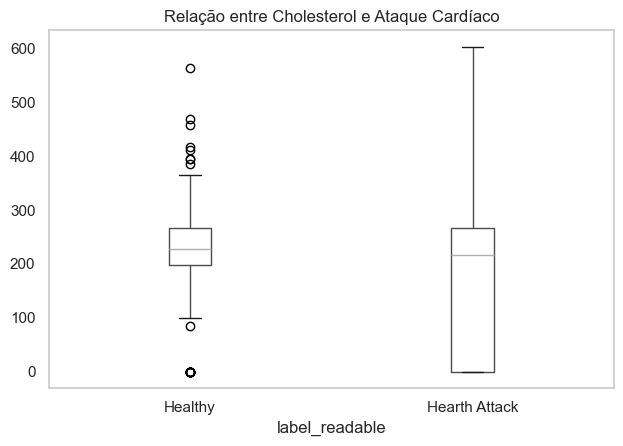

In [18]:
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                    data = heart_df,
                    x='label_readable',
                    y='Cholesterol',
                    title="Relação entre Cholesterol e Ataque Cardíaco",
                    xlabel="Tipo de Cholesterol",
                    ylabel="Cholesterol value"
                    )

### MaxHR

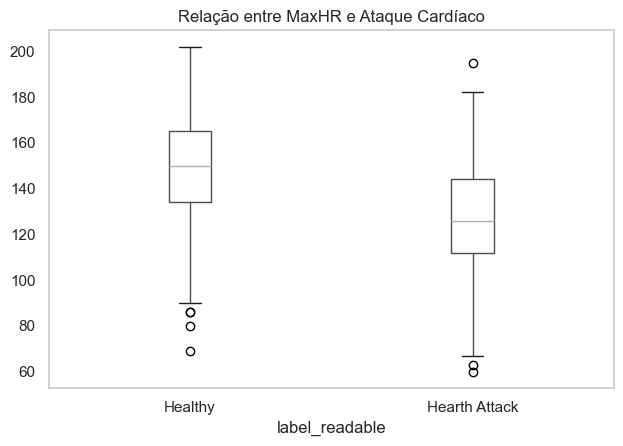

In [19]:
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                    data = heart_df,
                    x='label_readable',
                    y='MaxHR',
                    title="Relação entre MaxHR e Ataque Cardíaco",
                    xlabel="Tipo de MaxHR",
                    ylabel="MaxHR value"
                    )


### Age

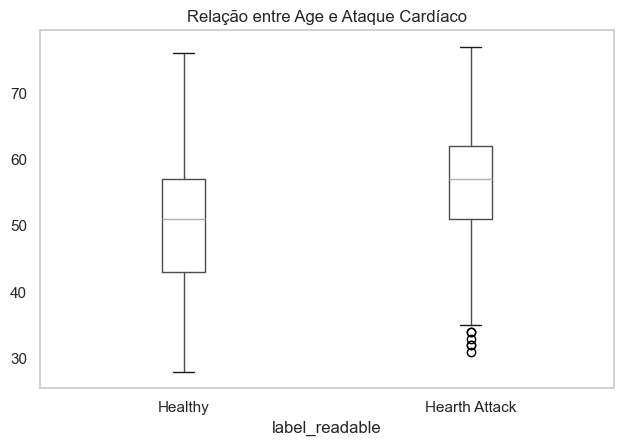

In [20]:
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                    data = heart_df,
                    x='label_readable',
                    y='Age',
                    title="Relação entre Age e Ataque Cardíaco",
                    xlabel="Tipo de Age",
                    ylabel="Age value"
                    )

### Duas variaveis + target - Sex+Age+target

#### 

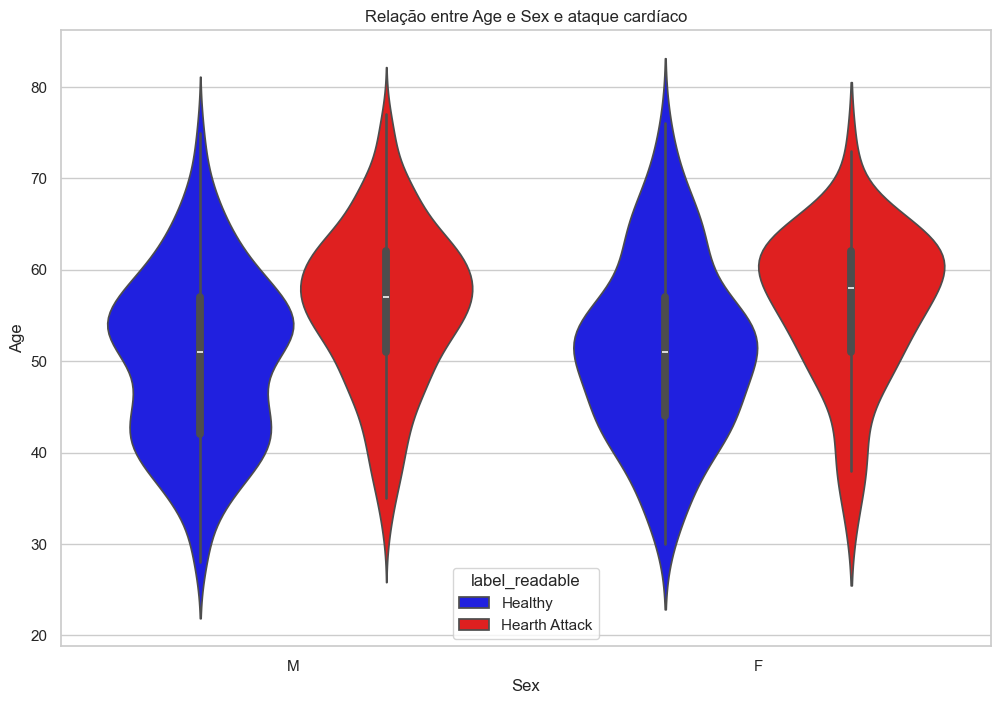

<Figure size 640x480 with 0 Axes>

In [21]:
violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)


heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                     data = heart_df
                    ,x = 'Sex'
                    ,y = 'Age'
                    ,hue = 'label_readable'
                    ,palette={"Healthy": "blue", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

### Duas variaveis + target - Cholesterol+FastingBS+target

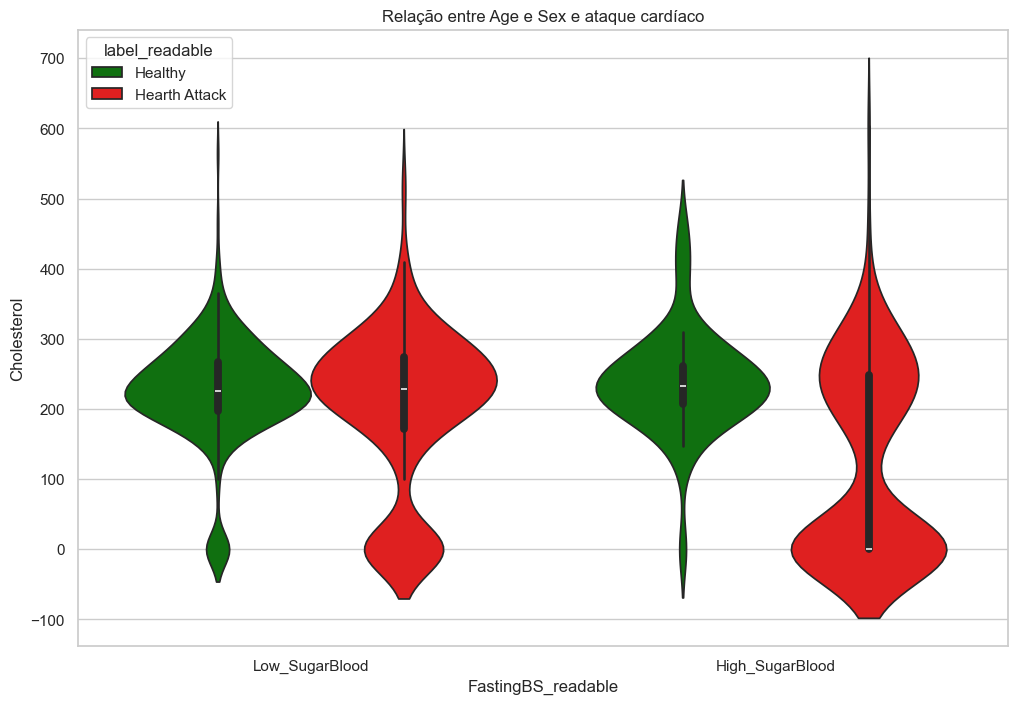

<Figure size 640x480 with 0 Axes>

In [22]:
violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

mapping = {0: 'Low_SugarBlood', 1: 'High_SugarBlood'}
heart_df['FastingBS_readable'] = heart_df['FastingBS'].map(mapping)

factory.create_plot(
                     data = heart_df
                    ,x = 'FastingBS_readable'
                    ,y = 'Cholesterol'
                    ,hue = 'label_readable'
                    ,palette = {"Healthy": "green", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

In [23]:
resultado = heart_df.groupby(['FastingBS', 'label']) \
                                            .agg(count=('label', 'count')) \
                                            .reset_index()


resultado

,FastingBS,label,count
0,0,0,366
1,0,1,338
2,1,0,44
3,1,1,170


### 'MaxHR', 'ExerciseAngina', target


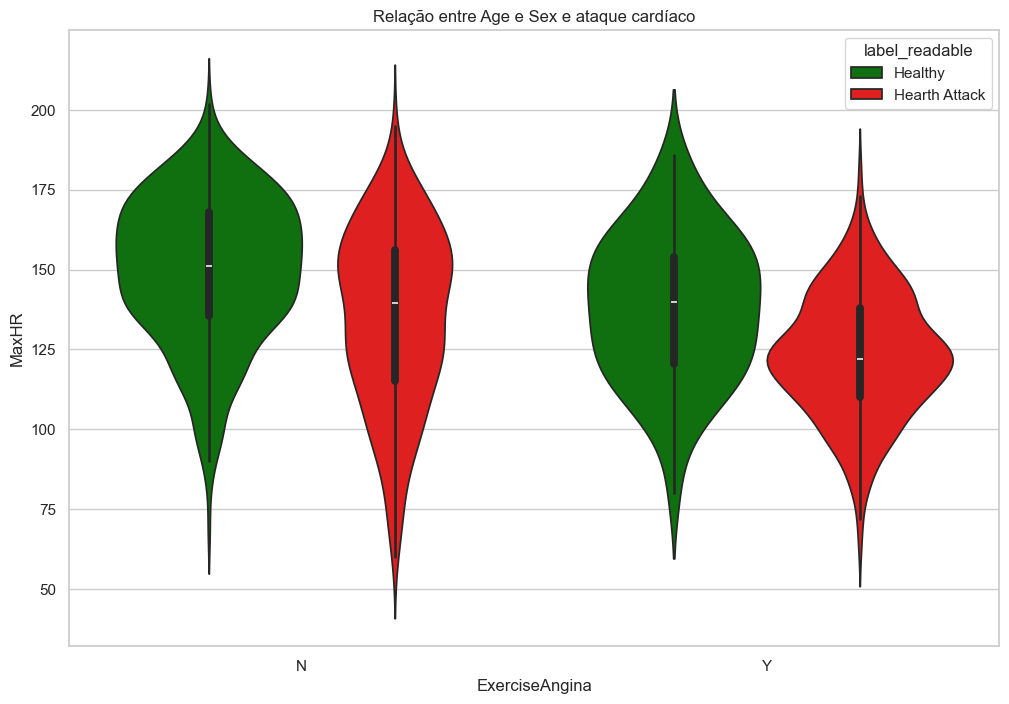

<Figure size 640x480 with 0 Axes>

In [24]:
violinplot_strategy = ViolinPlotSeabornStrategy()
factory = PlotFactory(violinplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

mapping = {0: 'Low_SugarBlood', 1: 'High_SugarBlood'}
heart_df['FastingBS_readable'] = heart_df['FastingBS'].map(mapping)

factory.create_plot(
                     data = heart_df
                    ,x = 'ExerciseAngina'
                    ,y = 'MaxHR'
                    ,hue = 'label_readable'
                    ,palette = {"Healthy": "green", "Hearth Attack": "red"}
                    ,title = "Relação entre Age e Sex e ataque cardíaco"
                    ,xlabel = "Sex"
                    ,ylabel = "Age"
                    )

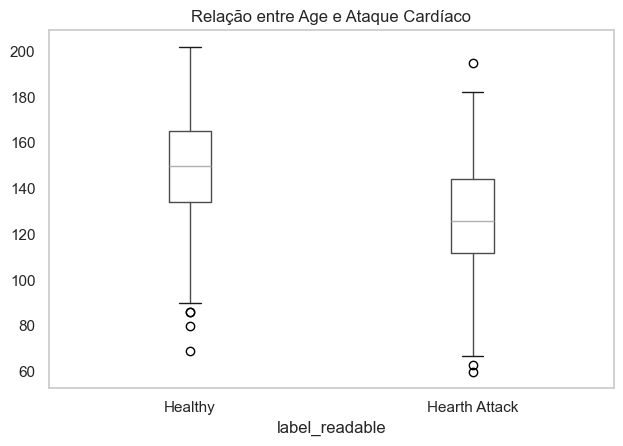

In [25]:
boxplot_strategy = BoxPlotPandasStrategy()
factory = PlotFactory(boxplot_strategy)

heart_df['label_str'] = heart_df['label'].astype('string') 

mapping = {'0': 'Healthy', '1': 'Hearth Attack'}
heart_df['label_readable'] = heart_df['label_str'].map(mapping)

factory.create_plot(
                    data = heart_df,
                    x='label_readable',
                    y='MaxHR',
                    title="Relação entre Age e Ataque Cardíaco",
                    xlabel="Tipo de Age",
                    ylabel="Age value"
                    )

In [26]:
 heart_df.loc[:,  ['ExerciseAngina',	'Oldpeak',	'ST_Slope', 'ChestPainType', 'label']].head(4)


resultado = heart_df.groupby(['ExerciseAngina',	'ST_Slope', 'ChestPainType', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()

# df.sort_values(by='Age', kind='mergesort')

# resultado.sort_values(by=['label', 'count'], kind='mergesort',ascending=False, inplace=True)
resultado.sort_values(by=['ExerciseAngina',	'ST_Slope',	'ChestPainType'], kind='mergesort',ascending=False, inplace=True)

resultado.loc[resultado['count'] >10, :]

,ExerciseAngina,ST_Slope,ChestPainType,label,count
36,Y,Up,ASY,0,11
37,Y,Up,ASY,1,31
33,Y,Flat,NAP,1,32
28,Y,Flat,ASY,0,16
29,Y,Flat,ASY,1,202
25,Y,Down,ASY,1,35
22,N,Up,TA,0,14
20,N,Up,NAP,0,90
18,N,Up,ATA,0,127
16,N,Up,ASY,0,60


In [27]:

resultado = heart_df.groupby(['RestingECG', 'label']) \
                                                        .agg(count=('label', 'count')) \
                                                        .reset_index()


resultado['label_str'] = resultado['label'].astype('string') 
resultado['category'] = resultado['RestingECG'] + "_" + resultado['label_str']


resultado_piv = resultado.pivot(index = 'label_str', 
                                columns='RestingECG', 
                                values = 'count').reset_index()

resultado_piv

RestingECG,label_str,LVH,Normal,ST
0,0,82,267,61
1,1,106,285,117


#### Tabela de contingencia

In [28]:

# Exemplo com 3 variáveis categóricas
tabela_3d = pd.crosstab(
                        index=heart_df['label'],
                        columns=[heart_df['ExerciseAngina'], 
                                 heart_df['ST_Slope'],
                                 heart_df['ChestPainType']],
                        margins=True  # Mostra totais
                       )



display(tabela_3d)

ExerciseAngina    N                                                 Y      \
ST_Slope       Down            Flat              Up              Down       
ChestPainType   ASY ATA NAP TA  ASY ATA NAP  TA ASY  ATA NAP  TA  ASY NAP   
label                                                                       
0                 2   2   4  3   13  12  22   6  60  127  90  14    2   1   
1                 7   1   2  1   87   9  27  12  30    5   7   4   35   3   
All               9   3   6  4  100  21  49  18  90  132  97  18   37   4   

ExerciseAngina                                 All  
ST_Slope       Flat             Up                  
ChestPainType   ASY ATA NAP TA ASY ATA NAP TA       
label                                               
0                16   2   7  1  11   6   7  2  410  
1               202   9  32  3  31   0   1  0  508  
All             218  11  39  4  42   6   8  2  918

                  Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age          1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP    0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS    0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR       -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak      0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
label        0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

                label  
Age          0.282039  
RestingBP    0.107589  
Cholesterol -0.232741  
FastingBS    0.267291  
MaxHR       -0.400421  
Oldpeak      0.403951  
label        1.000000  


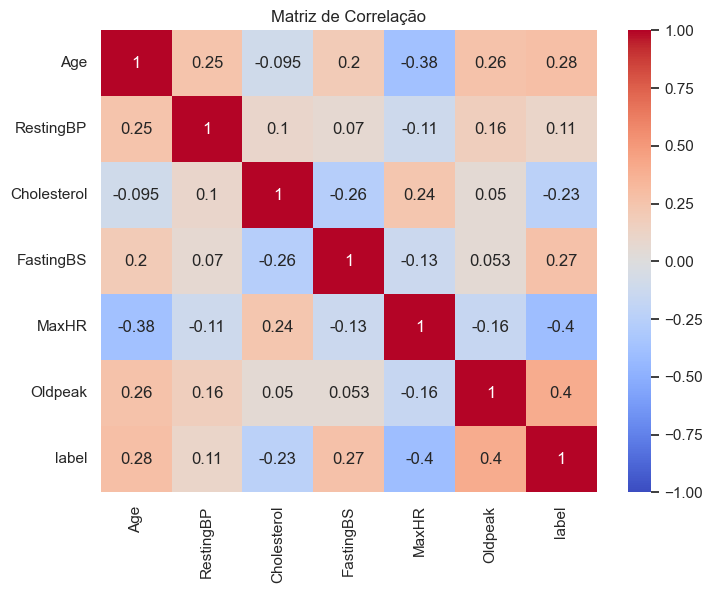

In [29]:
# Lista das colunas categóricas
train_num = heart_df.select_dtypes(include=[np.number])
num_cols = train_num.columns


matriz_correlacao = train_num.corr()
print(matriz_correlacao)

# como heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

#### distribuição dos dados

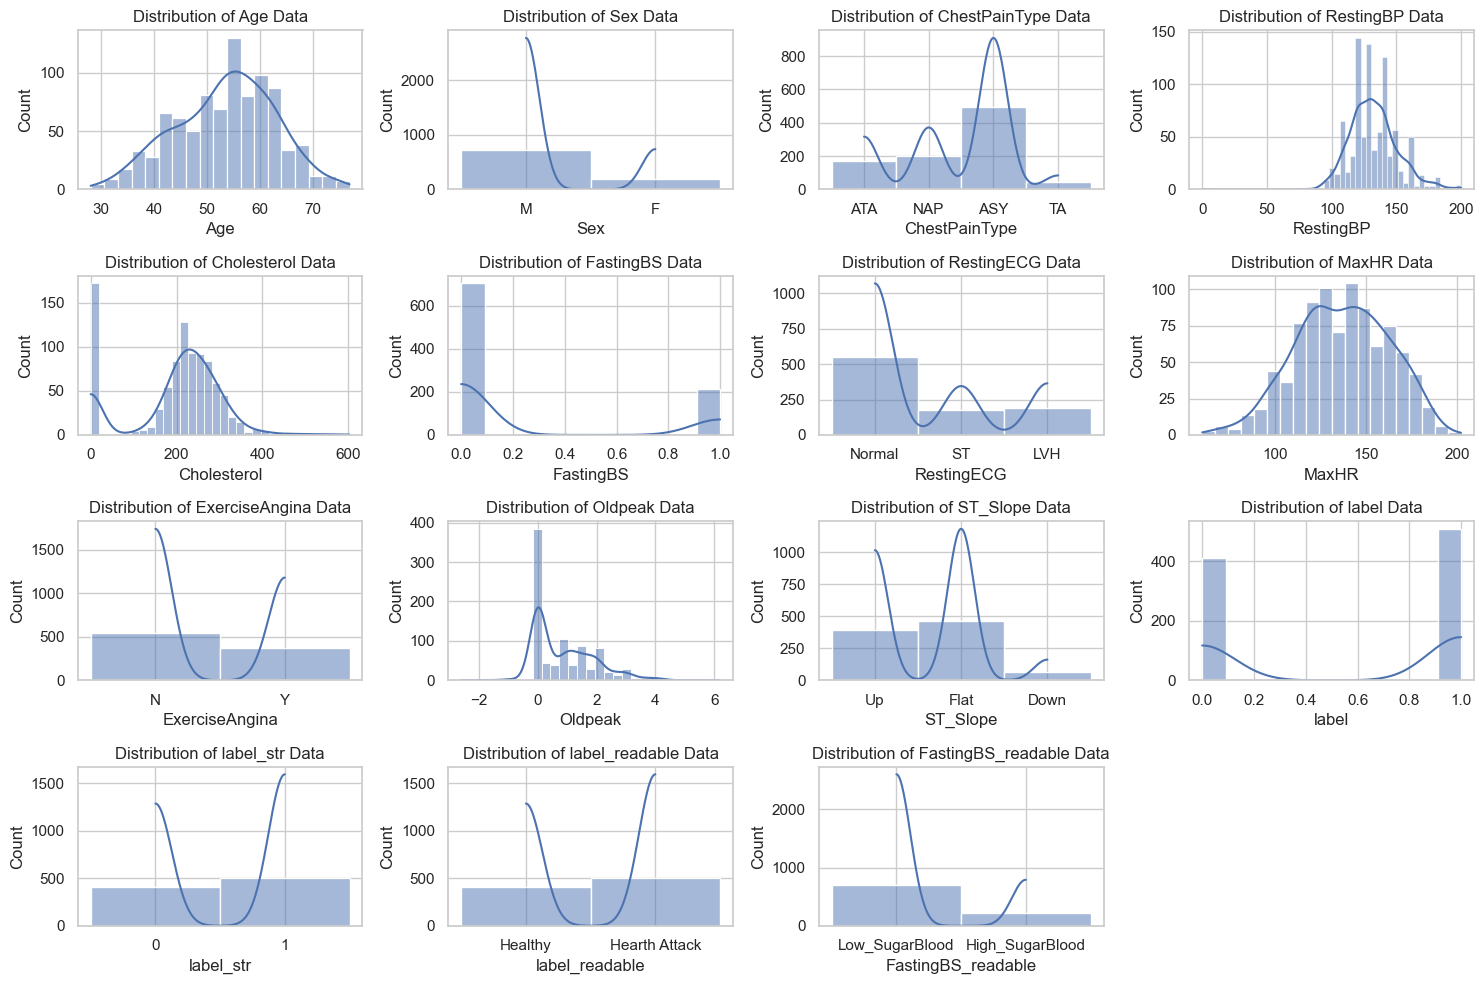

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart_df.columns,1):
    # print(i)
    # print(col)
    plt.subplot(4,4,i)
    # plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_df[col],kde=True)
    plt.tight_layout()
    plt.plot()

[]

<Figure size 1500x1000 with 0 Axes>

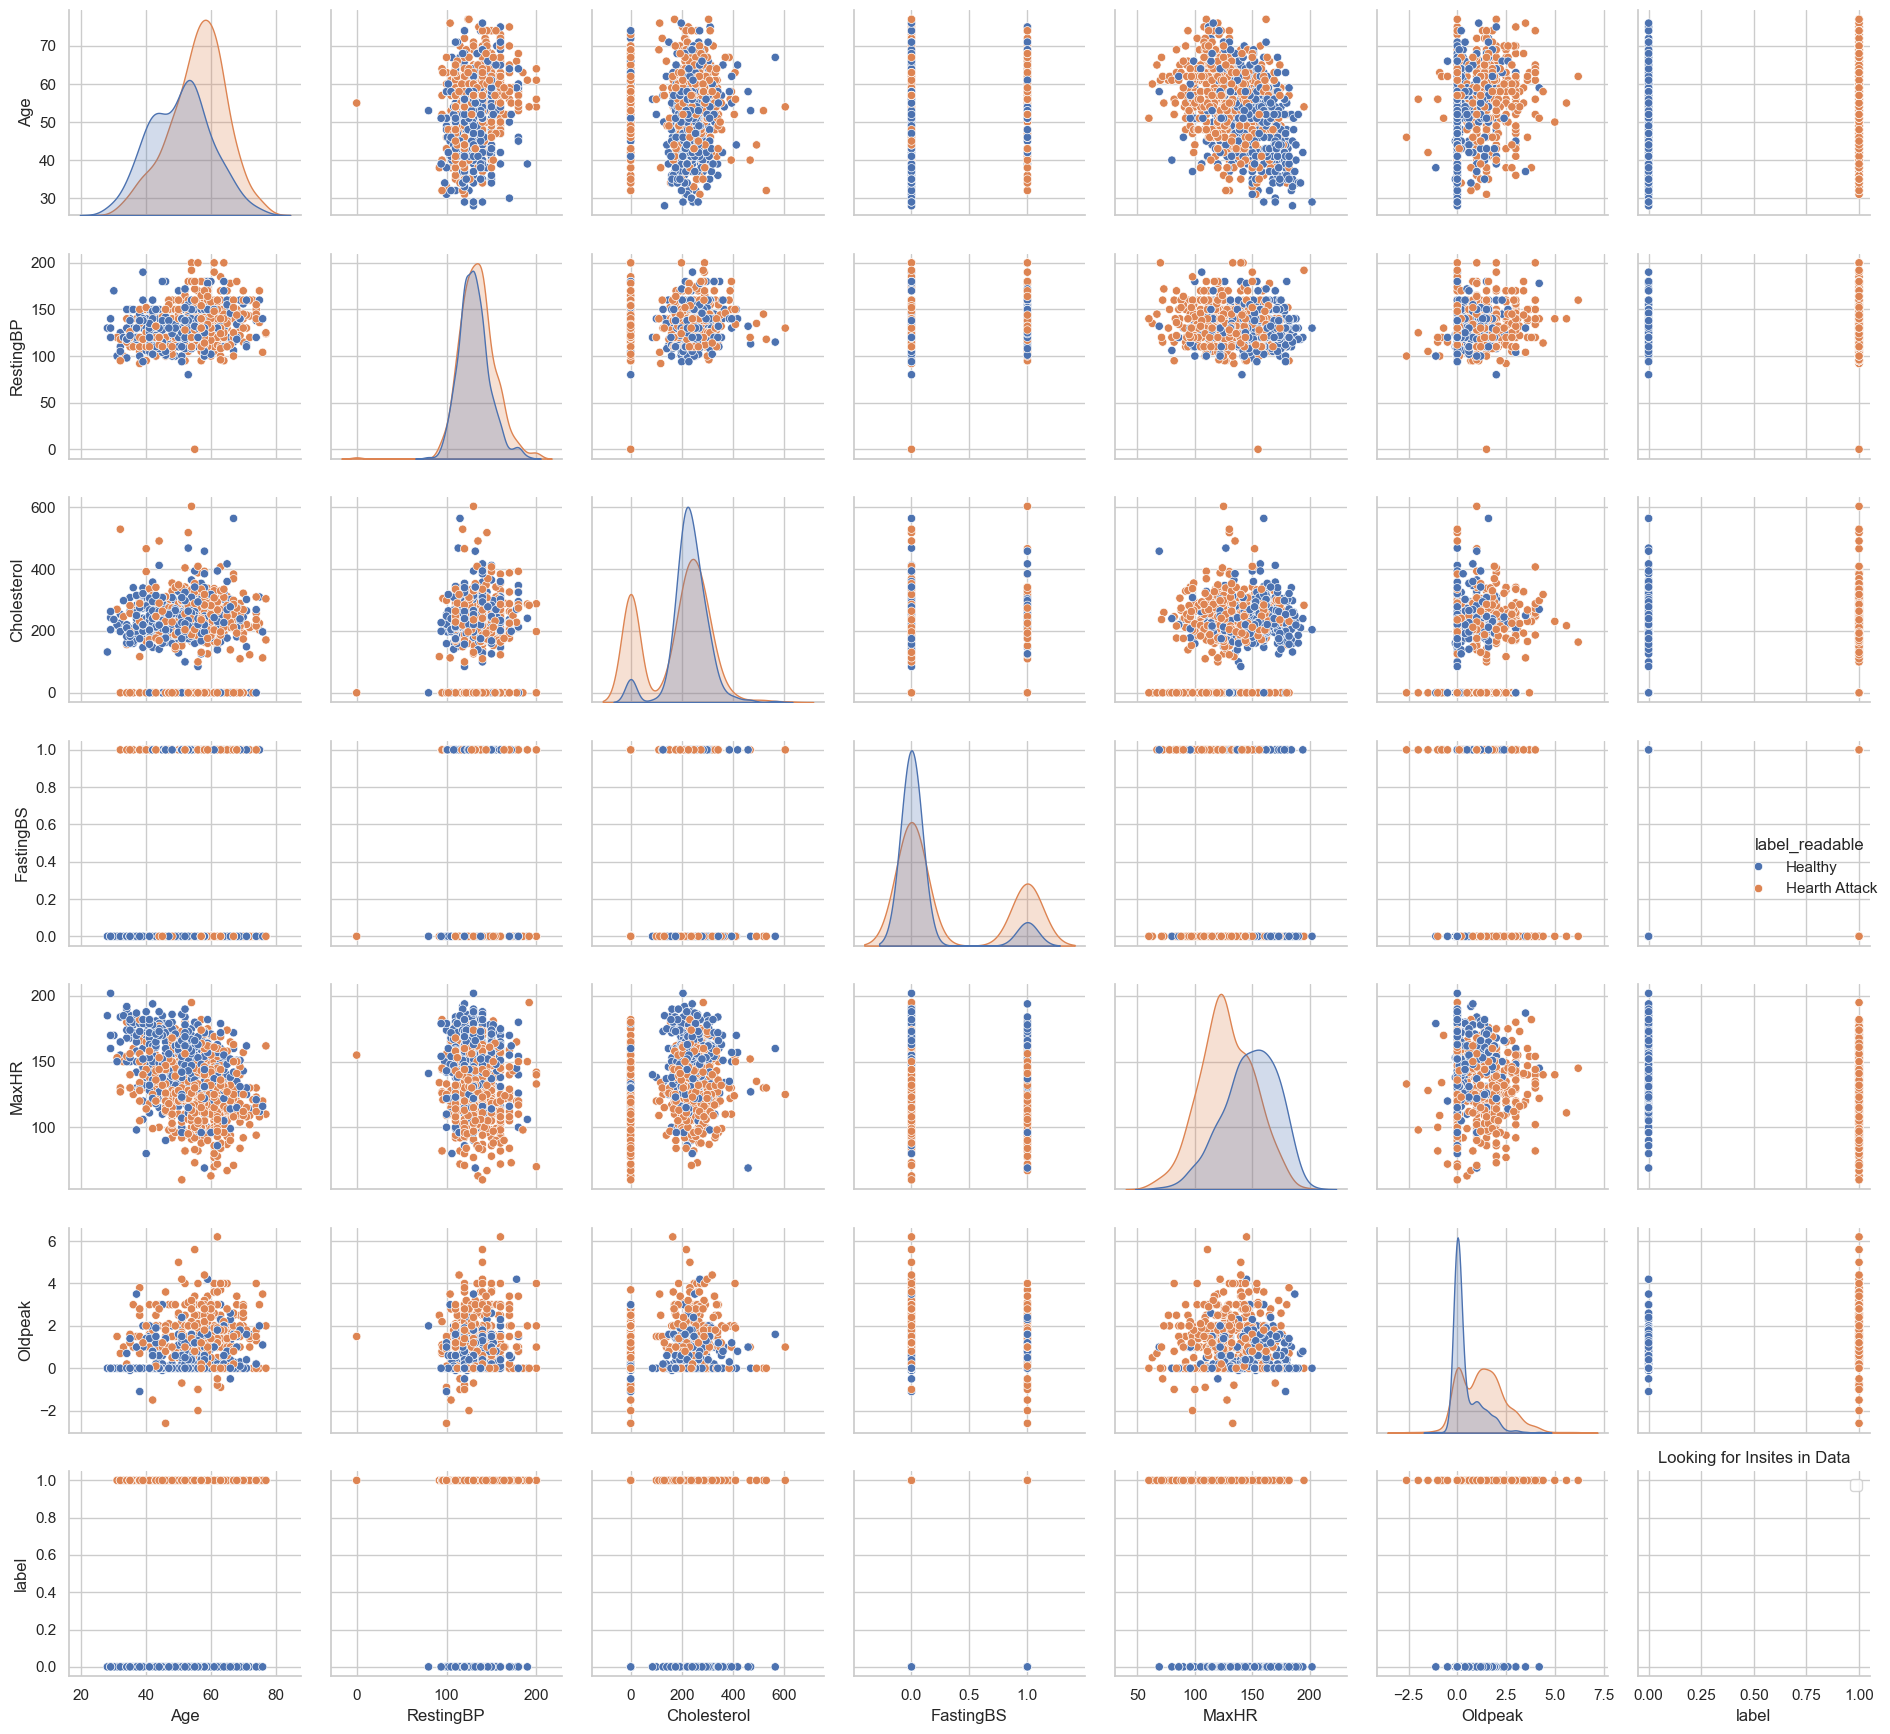

In [31]:

# heart_df.columns

plt.figure(figsize=(15,10))
sns.pairplot(heart_df,hue="label_readable")
plt.title("Looking for Insites in Data")
plt.legend("Hearth Disease")
plt.tight_layout()
plt.plot()